# Linear Regression - Bike Sharing Assignment

<b>Definition:<b>
    
Linear Regression is a technique to find a best fit line to show linear relationship between one or more dependent variable called predictors and a dependent variable called predicted. In this technique "Gradient Descent" Method to find the coefficent of our regression line which is given by $ Y = mX + c + e $ , where Y- predicted , m - slope of best fit line, X- predictor variable, c- the intercept on y axis i.e when all coeficients of predictor variables are zero the value of predicted variable Y will be "c + e" and e - is the error term as we allow a room to have error in our predictions.
    
This Notebook have discussed and taken care of all the assumptions , definitions and terminologies as and when required.

# Problem Statement:

Bike sharing is a system or service in which users share bikes in exchange of price or free as per company's policy. The user can borrow a bike from an automated "dock" , where he/she has to put in payment information and system installed on the dock allow user to take bike , use it , and return on another dock located at some different place of the city.

There is a US bike sharing service provider company "BoomBikes" have noticed considerably high dips in their revenues due to covid-19 situation. it is very difficut situation for them to sustain in current market. They don't to get hit hard post pandemic situation when everyting come on its track, therefore they are planning to prepare themselves for the post pandemic situation and cater their users need and stand out in the market as a profitable business.

To fulfill their aspirations, they have reached to a consulting company and provided their past data, based on which they want to analyse the future trends on bike-sharing service market. Specifically they want to understand the factors which affects or are going to affect the bike-sharing service market in america.  


***What do company wants to know:***

- What are the variables that are significant in predicting demand for bike-sharing services.
- How well those variables are capable to descibe the demand of service.

***Expected from us:***
- To develop a regression model that can signifcantly predict the demand for shared bikes with the help of available independent variables (predictors).
- Find the most significant variables out of the available inpendent variables (predictors), so that less can be more.
- The models should be represented in such a way that a non-tech person (Management Team) of comapany can understand it well and use that model to design their business strategy accordingly.

### Data Description


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Work flow in this Notebook

we have devided our analysis in Seven steps for the sake of readability and simplicity.

1. Reading and Understandng the Data
2.  EDA and Visualization
3. Data Preperation
4. Splitting the Data into Training and Testing Sets
5. Model Building
6. Making Prediction using The Final Model
7. Model Evaluation

In [106]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understandng the Data
To read ad understand the data we need some essential python libraries.

In [107]:
# Importing required libraries and Data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
bike = pd.read_csv('/content/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [109]:
# Checking Shape of DataSet

bike.shape

(730, 16)

In [110]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**-Shape of our dataset is (730,16) i.e. 730 Rows and 16 Columns.**

**-It has no null values as well**

**-Here 11 columns of Integer Type, 4 columns of Float type and 1 column of object type. which is date, that needs to be changed to date datatype.**

In [111]:
# Checking Duplicates

bike.duplicated().sum()

0

**-There are no duplicates as well**

In [112]:
# Checking Description of Data

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.1 Cleaning Data


-  `instant` column is record index, so do not have any significant with analysis.
- `dteday` column is redundant as we have other columns `weekday` , `yr` , and `mnth` to fulfill our prpose to know about time.
- Variable `registered` and `casual` are also redundant as they are summed upt to obtain our target variable `cnt`.
- Variable `atemp` and `temp` are also seems directly related to each other. therefore we will use `temp`.

These columns are to be removed as they are not going to be used in ouranalysis.

In [113]:
# Dropping above identified , non-usable columns

bike.drop(['instant','dteday','casual','registered','atemp'],axis=1, inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [114]:
bike.shape

(730, 11)

Renaming columns to make them more readable

In [115]:
bike.rename(columns={'yr':'year','mnth':'month','holiday':'is_holiday','workingday':'is_workingday','weathersit':'weather','hum':'humidity','cnt':'bike_count'},inplace = True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    int64  
 1   year           730 non-null    int64  
 2   month          730 non-null    int64  
 3   is_holiday     730 non-null    int64  
 4   weekday        730 non-null    int64  
 5   is_workingday  730 non-null    int64  
 6   weather        730 non-null    int64  
 7   temp           730 non-null    float64
 8   humidity       730 non-null    float64
 9   windspeed      730 non-null    float64
 10  bike_count     730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [116]:
# Classifying Categorical and Numeric variable in seperate list variables

# Categorical variables
cat_var_list = ['season','year','month','weekday','is_holiday','is_workingday','weather']

# numerical Variable
num_var_list = ['temp', 'humidity','windspeed','bike_count']

In [117]:
# Converting Data types of categorical variable to category

bike[cat_var_list] = bike[cat_var_list].astype('category')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         730 non-null    category
 1   year           730 non-null    category
 2   month          730 non-null    category
 3   is_holiday     730 non-null    category
 4   weekday        730 non-null    category
 5   is_workingday  730 non-null    category
 6   weather        730 non-null    category
 7   temp           730 non-null    float64 
 8   humidity       730 non-null    float64 
 9   windspeed      730 non-null    float64 
 10  bike_count     730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


In [118]:
# Checking statistical description after converting datatypes of categorical variable to 'category'
# Now only Numerical variables will be considered in statistical description.

bike.describe()

,temp,humidity,windspeed,bike_count
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [119]:
# Checking information about categorical variable.

bike.describe(include=['category'])

,season,year,month,is_holiday,weekday,is_workingday,weather
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,1,1,1
freq,188,365,62,709,105,504,463


In [120]:
# Mapping the 'integer' values in categorical variables to their corresponding 'string' values as per Data Dictionary Provided.

# Mapping seasons
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# mapping weekdays
bike['weekday'] = bike['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


# Mapping months
bike['month'] = bike['month'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

# Mapping weather
bike['weather'] = bike['weather'].map({1: 'Clear', 2: 'Misty', 3: 'LightRain', 4: 'HeavyRain'})

In [121]:
bike.head()

,season,year,month,is_holiday,weekday,is_workingday,weather,temp,humidity,windspeed,bike_count
0,spring,0,jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Step 2: EDA and Visualization

### 2.1 : Univariate Analysis

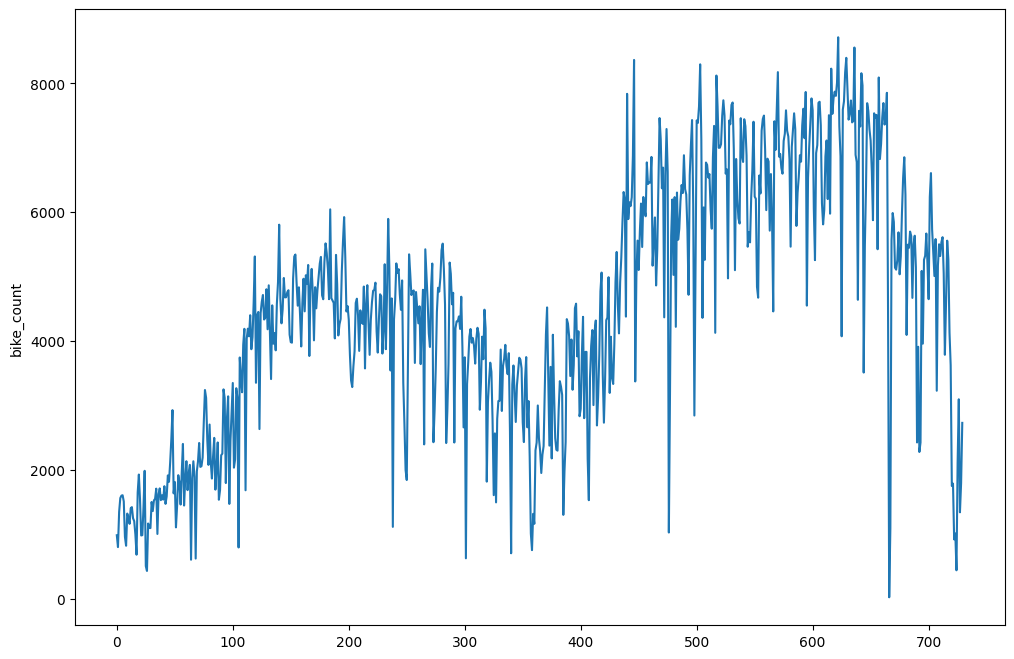

In [122]:
# Visualizing Target Variable pattern
plt.figure(figsize=(12,8))
sns.lineplot(bike.bike_count)
plt.show()

**Inference :** There is an increase in demand for bikes over time , but recently a downfall is observed, that may be due to situation of pandamic.  

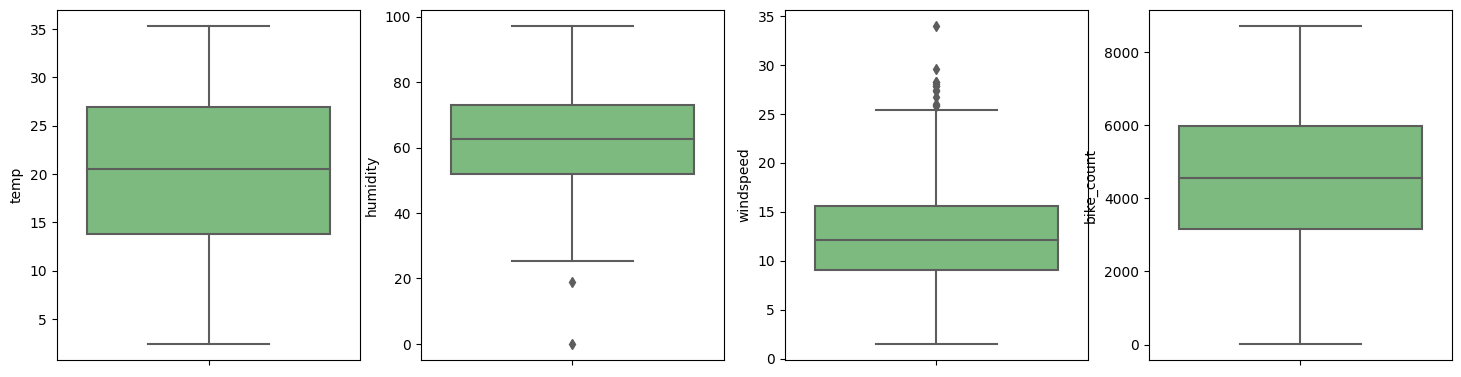

In [123]:
# Visualizing numerical variables.

# Checking the oulier in all NUmeric type variables.

num_var_vis_fig=plt.figure(figsize=(18,10))
a=1

for i in num_var_list:
    plt.subplot(2,4,a)
    sns.boxplot(y=i,data=bike,palette ='Greens')
    a+=1

num_var_vis_fig.savefig('num_var_vis_fig')
plt.show()

**-No Significant outliers are Observed**

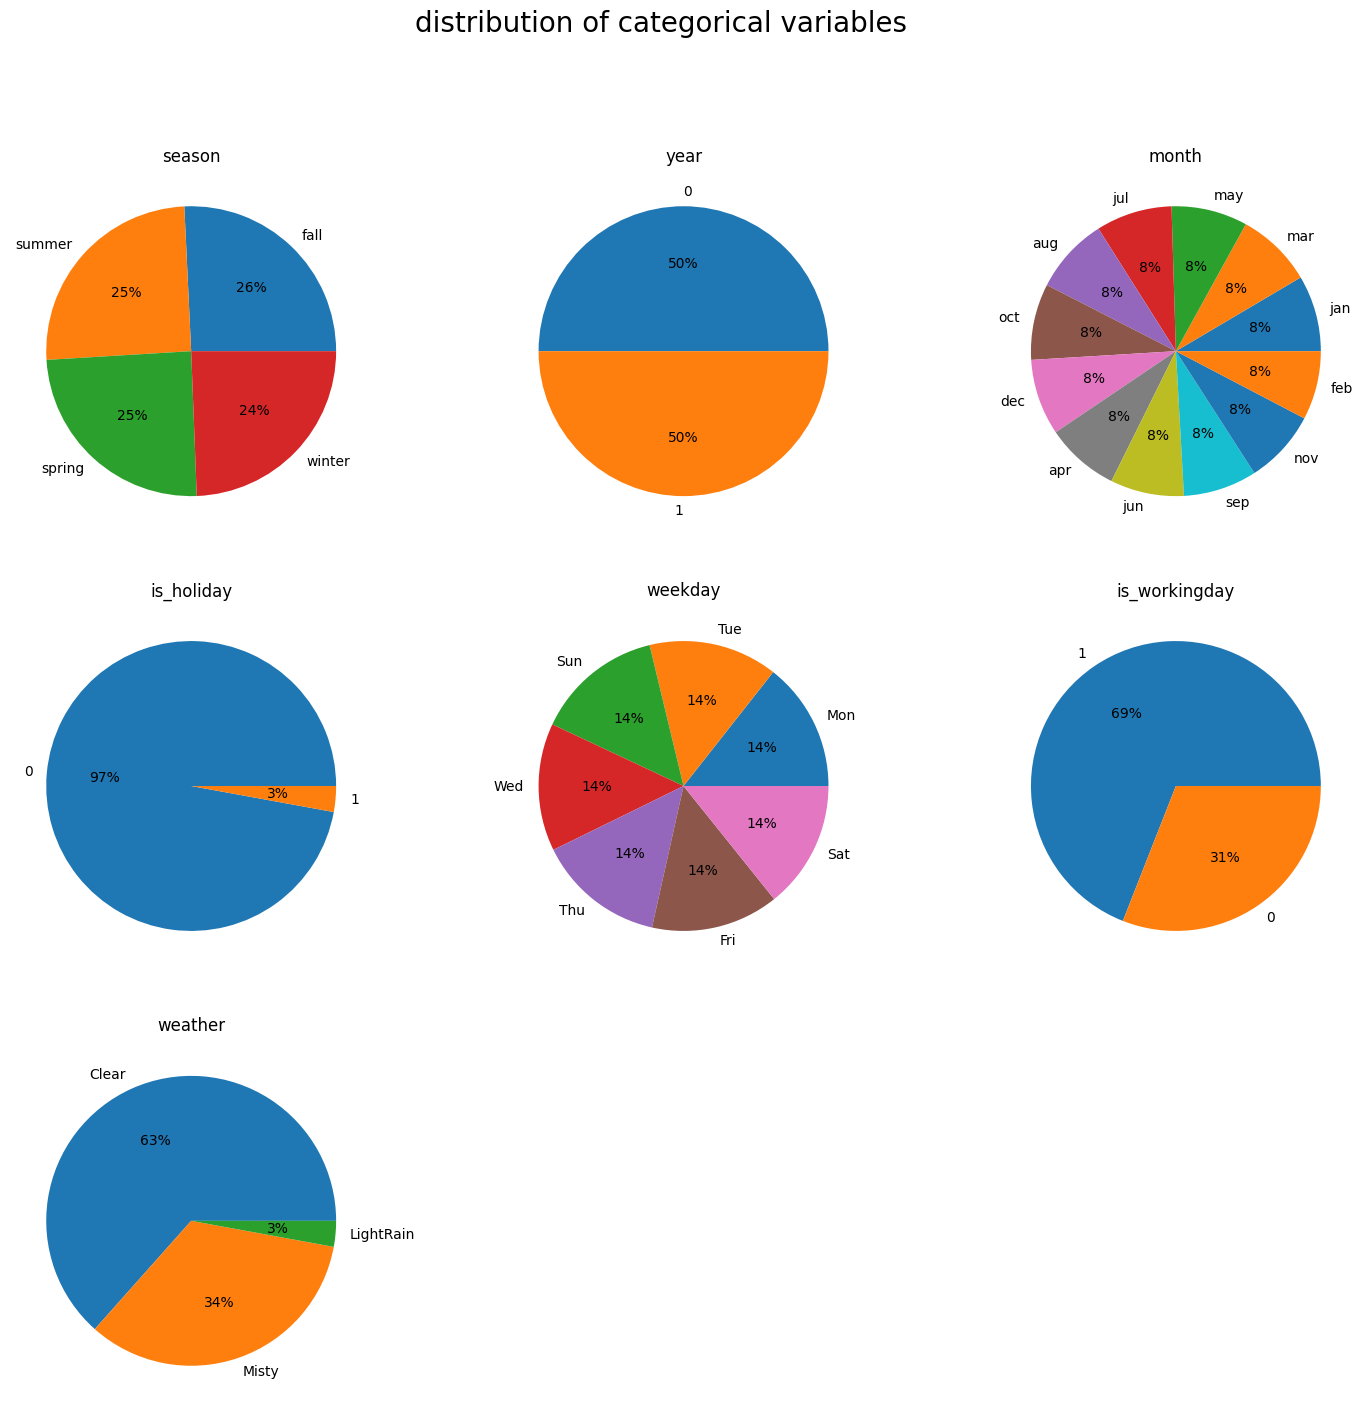

In [124]:
# Visulalising Categorical Variables

bike_plot=bike.select_dtypes(include='category')
cat_var_viz_fig = plt.figure(figsize=(18,16))
plt.suptitle('distribution of categorical variables', fontsize=20)
# explode = [0.1,0.1,0.1,0.1,0.1]
for i in range(1,bike_plot.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(bike_plot.columns.values[i-1])
    val=bike_plot.iloc[:,i-1].value_counts(normalize=True).values
    indx=bike_plot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(val,labels=indx,autopct='%1.0f%%')

cat_var_viz_fig.savefig('cat_var_viz_fig')
plt.show()


**Inference:**

- Data is not seems biased or we can say that equally distributed among `Seasons`, `year` , `months` and `weekdays` .
- Allmost equal number of entries for each category in season variable. and equal entries in rest (year, month, and weekday)
- Only 3% of entries are for holidays.
- 69% of data is for workingdays and 31% for non-working days
- no entry for 'HeavyRain' weather, highest number of entries for clear weather i.e. 63%, 34% entries for misty and 3% for lightRain.

### 2.2 : Bibariate Analysis

<Figure size 1800x800 with 0 Axes>

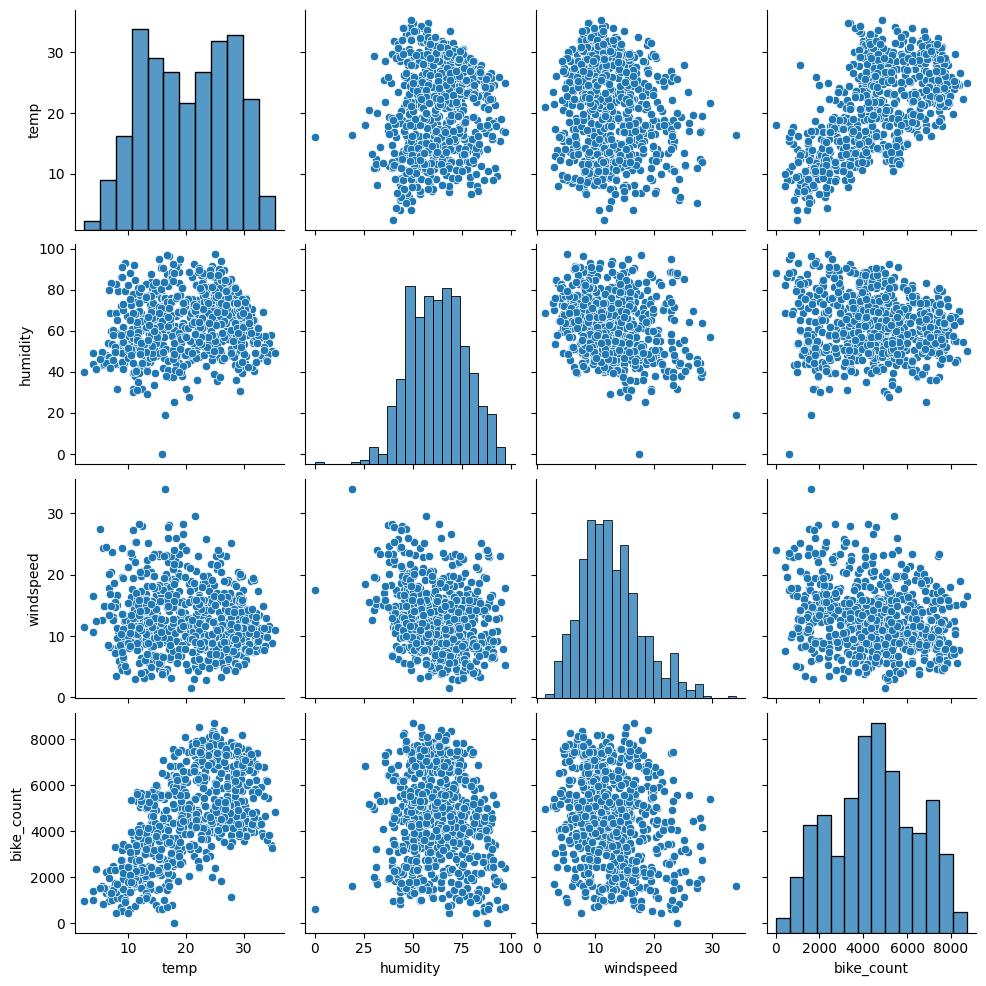

In [125]:
# Drawing Pairplot for Numerical (continuos) variables

pair_plot = plt.figure(figsize=(18,8))
sns.pairplot(data = bike , vars =['temp','humidity','windspeed','bike_count'] )
plt.show()
pair_plot.savefig('pair_plot')

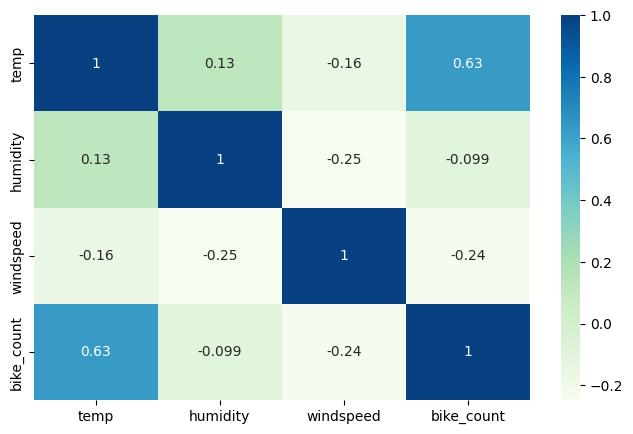

In [126]:
# Drawing Heatmap to observe correlation between numerical variables and target varget variables

heatmap = plt.figure(figsize=(8,5))
sns.heatmap(bike[['temp','humidity','windspeed','bike_count']].corr(), cmap = 'GnBu' , annot = True)
plt.show()
heatmap.savefig('heatmap')

**Inference:**

Only `temp` variable is having positive and highest correlation with target variable `bike_count`.

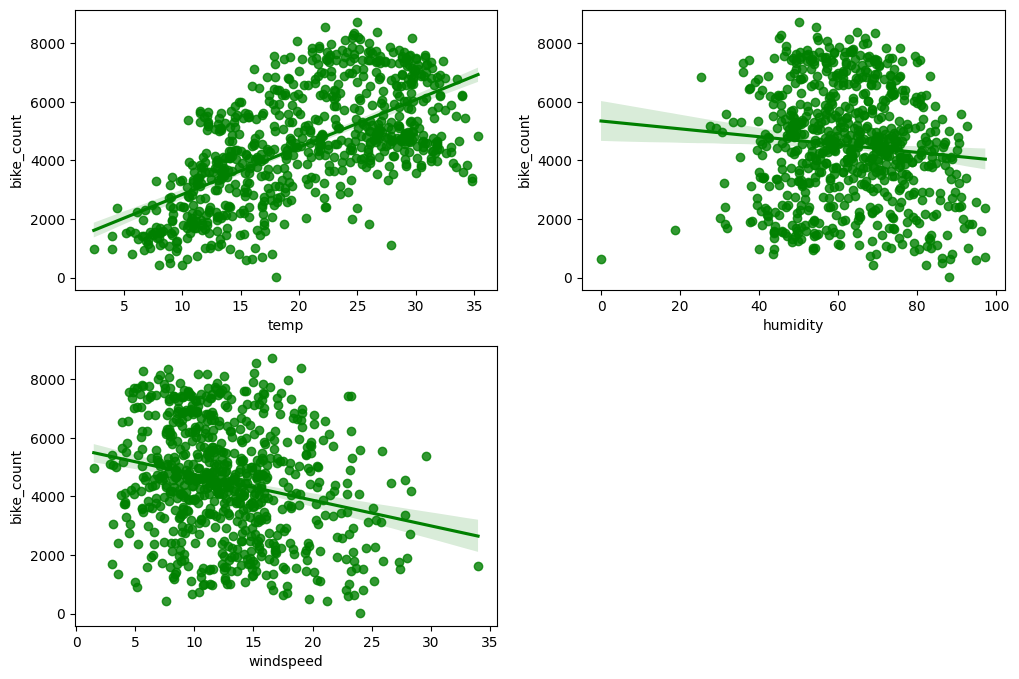

In [127]:
# Observing How demand of bike varies w.r.t to individual variable

num_var_list = ['temp','humidity','windspeed']
num_reg_plot = plt.figure(figsize=(12,8))

for var in enumerate(num_var_list):
    plt.subplot(2,2,var[0]+1)
    sns.regplot(data=bike,x=var[1],y='bike_count',color='Green')

num_reg_plot.savefig('num_reg_plot')
plt.show()

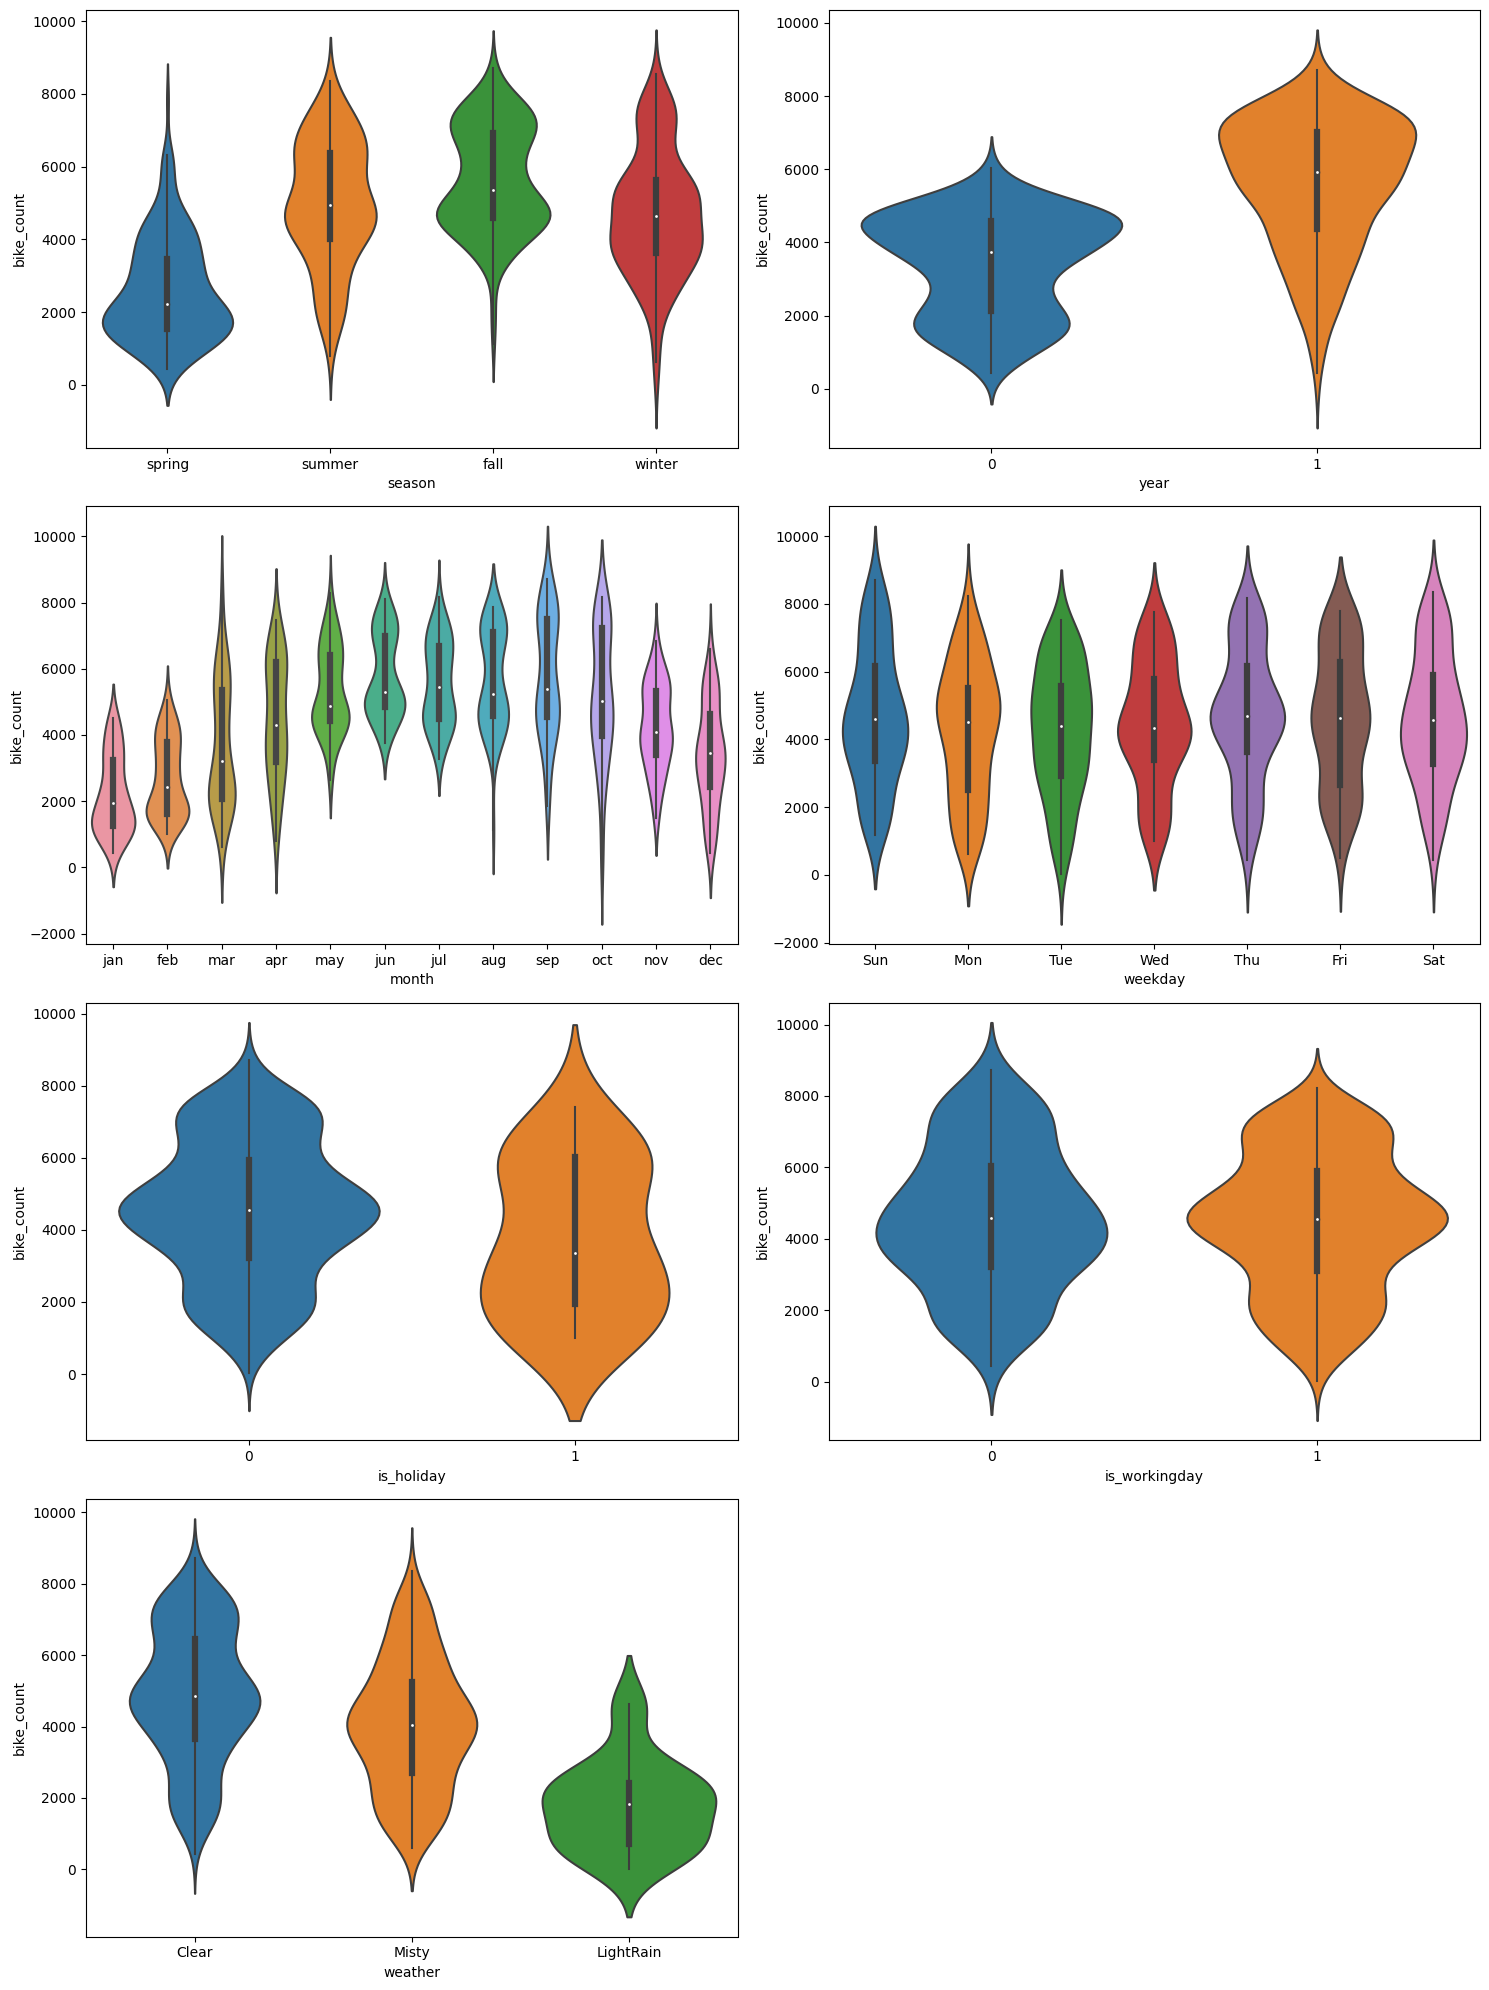

In [128]:
# Analysis of Categorical Vaariables

fig = plt.figure(figsize=(15,20))
a=1
for var in cat_var_list:
    plt.subplot(4,2,a)
    sns.violinplot(data=bike, x=var, y="bike_count")
    a+=1

plt.tight_layout()
plt.show()
fig.savefig("CatVarAnalysFig")

**Inference :**

$Some$ $Inferences$ $can$ $also$ $be$ $drawn$ ,$are$:

- Season "fall" is showing highest demand for bikes, more than 5000
- A significant growth in demand for bikes can be seen for the year 2019 from 2018, approx 2000
- Having look on month-wise graph, we can say that , demand had significantly increased month-on-month till the month of july, then dipped a little in the month of august and then rose a little in september and the decreased.
- Less demand has been observed on holidays.
- No significant change in demand is observed on weekdays.
- Approximately same demand is obsrved on working-days and non-working-days.
- Lowest demand was observed in 'cloudy' weather and highest demand when weather was 'clear'.

## Step 3 : Data Preperation

### 3.1 : Dummy Encoding

In [129]:
# Assigning dummy encoding to categorical variables

# Creating Dataframe of dummy variables
dummy_vars = pd.get_dummies(bike[['season','weekday','month','weather']],drop_first=True)

# concating dummy_vars to bike dataframe
bike = pd.concat([bike,dummy_vars], axis = 1)

# dropping old column
bike.drop(['season','weekday','month','weather'], axis=1, inplace=True)

bike.head()

,year,is_holiday,is_workingday,temp,humidity,windspeed,bike_count,season_summer,season_fall,season_winter,...,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weather_Misty,weather_LightRain
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# Checking Dataframe
bike.shape

(730, 29)

In [131]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   year               730 non-null    category
 1   is_holiday         730 non-null    category
 2   is_workingday      730 non-null    category
 3   temp               730 non-null    float64 
 4   humidity           730 non-null    float64 
 5   windspeed          730 non-null    float64 
 6   bike_count         730 non-null    int64   
 7   season_summer      730 non-null    uint8   
 8   season_fall        730 non-null    uint8   
 9   season_winter      730 non-null    uint8   
 10  weekday_Mon        730 non-null    uint8   
 11  weekday_Tue        730 non-null    uint8   
 12  weekday_Wed        730 non-null    uint8   
 13  weekday_Thu        730 non-null    uint8   
 14  weekday_Fri        730 non-null    uint8   
 15  weekday_Sat        730 non-null    uint8   
 16  month_fe

In [132]:
# Converting year , is_holiday and is_workingday data-types to numeric 'uint8' type

bike[['year','is_holiday','is_workingday']] = bike[['year','is_holiday','is_workingday']].astype('uint8')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               730 non-null    uint8  
 1   is_holiday         730 non-null    uint8  
 2   is_workingday      730 non-null    uint8  
 3   temp               730 non-null    float64
 4   humidity           730 non-null    float64
 5   windspeed          730 non-null    float64
 6   bike_count         730 non-null    int64  
 7   season_summer      730 non-null    uint8  
 8   season_fall        730 non-null    uint8  
 9   season_winter      730 non-null    uint8  
 10  weekday_Mon        730 non-null    uint8  
 11  weekday_Tue        730 non-null    uint8  
 12  weekday_Wed        730 non-null    uint8  
 13  weekday_Thu        730 non-null    uint8  
 14  weekday_Fri        730 non-null    uint8  
 15  weekday_Sat        730 non-null    uint8  
 16  month_feb          730 non

### 3.2 : Splitting the Data into Training and Testing Sets

In [133]:
# Importing Required libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [134]:
# Splitting Data into training and testing sets

bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=10)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


### 3.3 : Scaling Data to normalize values.

Data points in continuos variables are having different range of values, therefore we are normalizing them to make the process light.

In [135]:
# Scaling Traing and Testing Data

# Creating Object of MinMAxScaler
scaler =MinMaxScaler()

# fitting over Traing Data
bike_train[num_var_list]=scaler.fit_transform(bike_train[num_var_list])
bike_test[num_var_list]=scaler.fit_transform(bike_test[num_var_list])


In [136]:
bike_train.describe()

,year,is_holiday,is_workingday,temp,humidity,windspeed,bike_count,season_summer,season_fall,season_winter,...,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weather_Misty,weather_LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.033333,0.698039,0.512980,0.564620,0.343339,4508.443137,0.256863,0.235294,0.260784,...,0.086275,0.072549,0.068627,0.076471,0.090196,0.084314,0.092157,0.094118,0.345098,0.033333
std,0.500429,0.179682,0.459559,0.233096,0.183343,0.162447,1954.658091,0.437332,0.424599,0.439494,...,0.281045,0.259649,0.253068,0.266010,0.286744,0.278131,0.289531,0.292279,0.475867,0.179682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.314983,0.427182,0.227237,3137.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.506068,0.563897,0.323711,4497.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721686,0.698806,0.434281,6028.750000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
bike_test.describe()

,year,is_holiday,is_workingday,temp,humidity,windspeed,bike_count,season_summer,season_fall,season_winter,...,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weather_Misty,weather_LightRain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.484018,0.018265,0.675799,0.569906,0.655127,0.381600,4516.639269,0.242009,0.310502,0.200913,...,0.082192,0.105023,0.123288,0.105023,0.059361,0.086758,0.059361,0.063927,0.315068,0.018265
std,0.500889,0.134214,0.469148,0.245634,0.145867,0.186297,1895.411319,0.429281,0.463759,0.401601,...,0.275286,0.307285,0.329520,0.307285,0.236840,0.282125,0.236840,0.245183,0.465607,0.134214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.349713,0.545516,0.253078,3226.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.592845,0.657783,0.355128,4661.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.799587,0.760383,0.482087,5857.500000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8167.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.4 : Split bike_train and bike_test into X_train and y_train and X_test and y_test respectively

In [138]:
# Creating X_train and y_train
y_train = bike_train.pop('bike_count')
X_train = bike_train
X_train.head()

,year,is_holiday,is_workingday,temp,humidity,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weather_Misty,weather_LightRain
323,0,0,1,0.478808,0.634717,0.337184,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
72,0,0,1,0.298094,0.394939,0.236118,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.695953,0.364071,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
700,1,0,1,0.327249,0.812033,0.210252,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
264,0,0,0,0.694699,0.912672,0.217975,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [139]:
# Creating X_test and y_test
y_test = bike_test.pop('bike_count')
X_test = bike_test

X_test.head()

,year,is_holiday,is_workingday,temp,humidity,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weather_Misty,weather_LightRain
566,1,0,0,0.679339,0.912636,0.428283,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.315891,0.681798,0.363794,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0.839669,0.417870,0.151039,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.745792,0.600661,0.529553,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.800642,0.495644,0.587203,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Step 4: Model Building

### 4.1 : Building Model Using RFE

In [140]:
X_train.columns

Index(['year', 'is_holiday', 'is_workingday', 'temp', 'humidity', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'weekday_Mon',
       'weekday_Tue', 'weekday_Wed', 'weekday_Thu', 'weekday_Fri',
       'weekday_Sat', 'month_feb', 'month_mar', 'month_apr', 'month_may',
       'month_jun', 'month_jul', 'month_aug', 'month_sep', 'month_oct',
       'month_nov', 'month_dec', 'weather_Misty', 'weather_LightRain'],
      dtype='object')

In [141]:
# Selecting 15 Variables using RFE

# creatng object for linearregression
lr = LinearRegression()

# fitting over training data
lr.fit(X_train, y_train)

# Creating RFE object
rfe = RFE(estimator=lr, n_features_to_select=15)

# fittin over trainng data
rfe = rfe.fit(X_train, y_train)

In [142]:
col_list = X_train.columns[rfe.support_]
col_list

Index(['year', 'is_holiday', 'temp', 'humidity', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'month_mar', 'month_may', 'month_aug',
       'month_sep', 'month_oct', 'weather_Misty', 'weather_LightRain'],
      dtype='object')

### 4.2 Building model using statsmodel, for the detailed statistics

In [143]:
# Creating X_train_rfe with RFE selected variables
X_train_rfe = X_train[col_list]

In [144]:
# create function for stats linear model
def model_builder(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

# Creating Function to calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif
mse=0.0097

In [145]:
# Creating Model-1 and checking it's summary
lm_1 = model_builder(X_train_rfe)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          2.42e-191
Time:                        15:15:47   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     494   BIC:                             8313.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2029.1201    200.98

**REmoving 'month_may' column as it is having p-value greater than 0.05 (threshold)**

In [146]:
# removing variables having p-values >0.05 'month_may'

X_train_rfe.drop(['month_may'], axis = 1, inplace=True)

# Updating Model
lm_1 = model_builder(X_train_rfe)


In [147]:
# Checking summary again
print(lm_1.summary())

# Caculating VIF again
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.5
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          9.36e-192
Time:                        15:15:47   Log-Likelihood:                -4108.4
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1991.4736    200.45

**Inference:**

- Our $R^2$ is 0.847 and Adj.$R^2$ is 0.843 which is good.
- All the selected variables having p-values less than 0.05 threshold, therefore we cannot remove any more variables based on p-value.
- now we will look for VIF values and check all those columns which are having VIF > 5 .
- Here we have three variables , whse VIF is greater than 5 , that are `temp` 19.27 , `humididty` 12.05 and `season_fall` 7.21.
- but as we have observed earlier while drawing pairplot that , `temp` variable was having highest and positive correlation with our target variable `bike_count`, therefore we will not remove it. instead we check by remocing `humidity` .

In [148]:
# droping `humidity` variable

X_train_new = X_train_rfe.drop(['humidity'], axis =1)
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 323 to 125
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               510 non-null    uint8  
 1   is_holiday         510 non-null    uint8  
 2   temp               510 non-null    float64
 3   windspeed          510 non-null    float64
 4   season_summer      510 non-null    uint8  
 5   season_fall        510 non-null    uint8  
 6   season_winter      510 non-null    uint8  
 7   month_mar          510 non-null    uint8  
 8   month_aug          510 non-null    uint8  
 9   month_sep          510 non-null    uint8  
 10  month_oct          510 non-null    uint8  
 11  weather_Misty      510 non-null    uint8  
 12  weather_LightRain  510 non-null    uint8  
dtypes: float64(2), uint8(11)
memory usage: 17.4 KB


In [149]:
# Building Model-2

lm_2 = model_builder(X_train_new)
print(lm_2.summary())

# getting VIF values
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          7.58e-188
Time:                        15:15:47   Log-Likelihood:                -4120.5
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     496   BIC:                             8328.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1313.0742    148.27

**Inference:**
- after droping 'humidity' we have observed
   - No significant change in $R^2$ 0.84. and Adj. $R^2$ 0.836
   - p-value for 'month_aug' has increased to 0.096
   - Vif of season_fall has come to 6.98

In [150]:
# Removing month_aug

X_train_new = X_train_new.drop(['month_aug'], axis=1 )

In [151]:
# Creating Model-3

lm_3 = model_builder(X_train_new)
print(lm_3.summary())

# cAlculating Vif
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.2
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          2.01e-188
Time:                        15:15:47   Log-Likelihood:                -4121.9
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     497   BIC:                             8325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1304.2627    148.45

**Inference:**
- after droping 'month_aug' we have observed
   - No significant change in $R^2$ 0.839. and Adj. $R^2$ 0.835
   - All p-values are below 0.05 or zero.
   - Vif of season_fall has come to 6.15

In [152]:
# Dropping 'season_fall' and building Model 4

X_train_new = X_train_new.drop(['season_fall'],axis = 1)

# Create stats model and look for summary
lm_4 = model_builder(X_train_new)
print(lm_4.summary())

# getting VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.6
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          1.14e-184
Time:                        15:15:47   Log-Likelihood:                -4133.6
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     498   BIC:                             8342.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1210.7075    150.45

**Inference:**
- after droping 'season_fall' we have observed
   - No significant change in $R^2$ 0.832. and Adj. $R^2$ 0.828
   - All p-values are below 0.05 or zero.
   - Vif are also below 5
   - highest p-value is for month_mar 0.015 , lets drop it and see the effect on our Model

In [153]:
# Drpping 'month_mar' and crating Model-5

X_train_new = X_train_new.drop(['month_mar'],axis = 1)

# Create stats model and look for summary
lm_5 = model_builder(X_train_new)
print(lm_5.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.0
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          1.37e-184
Time:                        15:15:47   Log-Likelihood:                -4136.6
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     499   BIC:                             8342.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1283.6754    148.19

**Inference:**
- after droping 'month_mar' we have observed
   - No significant change in $R^2$ 0.830. and Adj. $R^2$ 0.826
   - All p-values are below 0.05 or zero.
   - Vif are also below 5
   - highest p-value is for month_oct 0.004 , lets drop it and see the effect on our Model

In [154]:
# dropping 'month_oct' and building Model-6
X_train_new = X_train_new.drop(['month_oct'],axis = 1)

# Create stats model and look for summary
lm_6 = model_builder(X_train_new)
print(lm_6.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          5.72e-184
Time:                        15:15:47   Log-Likelihood:                -4141.0
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     500   BIC:                             8344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1236.6906    148.43

**Inference:**
- after droping 'month_oct' we have observed
   - No significant change in $R^2$ 0.827. and Adj. $R^2$ 0.824 . which is good
   - All p-values are below 0.05 or zero.
   - Vif are also below 5
   - here we will choose lm-6 as our final model.

**Final MOdel Variables and Coefficients**

In [155]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_6

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Finally Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Finally Selected Variables: ['year', 'is_holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'month_sep', 'weather_Misty', 'weather_LightRain']

Coefficent for the variables are:
const                1236.691
year                 2107.171
is_holiday           -806.839
temp                 4573.331
windspeed           -1148.078
season_summer         771.906
season_winter        1206.739
month_sep             837.138
weather_Misty        -690.767
weather_LightRain   -2202.272
dtype: float64


## Step 5: Model Evaluation

#### Residual Analysis

In [156]:
# Selecting final variables from the test dataset
X_train_res = X_train[var_final]

In [157]:
#Adding constant
X_train_res = sm.add_constant(X_train_res)

# predicting train set
y_train_pred = lm_final.predict(X_train_res)

In [158]:
y_train_pred

323    3555.299572
72     2328.889025
510    7258.843025
700    5115.067586
264    4309.899603
          ...     
123    2487.698920
369    4097.136634
320    2544.638289
527    6296.892235
125    3805.874983
Length: 510, dtype: float64

In [159]:
y_train

323    3520
72     2046
510    6536
700    4649
264    4795
       ... 
123    2633
369    3272
320    3053
527    4972
125    4608
Name: bike_count, Length: 510, dtype: int64

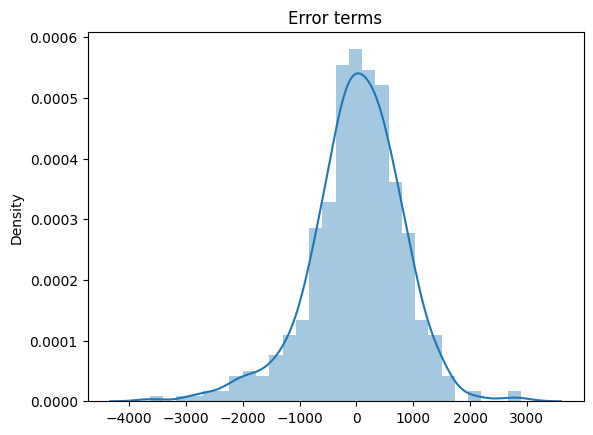

In [160]:
# Visualizing Distribution for Residuals
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

**Inference:**
Here the assumption of linear regression holds as the above distribution plot shows that , error terms are normally distributed with mean at zero.

Text(0, 0.5, 'Residual')

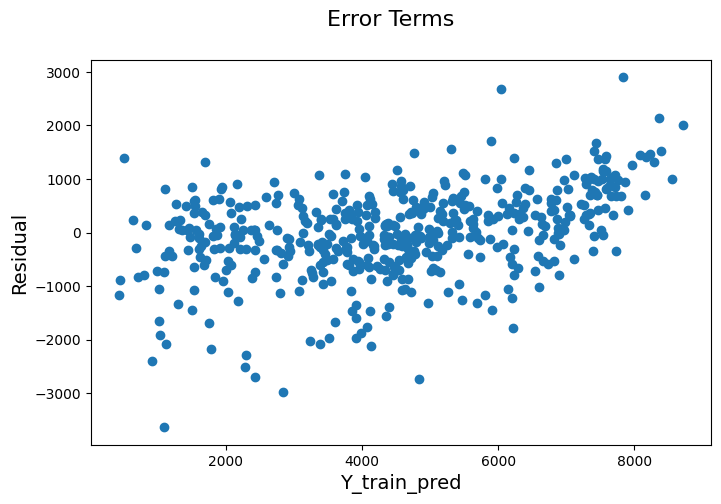

In [161]:
# Error terms train set

fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)
plt.xlabel('Y_train_pred', fontsize=14)
plt.ylabel('Residual', fontsize=14)

**Inference:**
- Above scatter plot depicts that error trems are randomly distributed and do not follow any pattern, which is one of the assumptions of linear regression. it hold true here.
- Also the error terms are having reasonably constant variance, which also an assumption that must be hold true , and it is done here.

## Step 6: Making Predictions

In [162]:
bike_test.head()

,year,is_holiday,is_workingday,temp,humidity,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weather_Misty,weather_LightRain
566,1,0,0,0.679339,0.912636,0.428283,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.315891,0.681798,0.363794,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0.839669,0.417870,0.151039,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.745792,0.600661,0.529553,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.800642,0.495644,0.587203,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [163]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 566 to 105
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               219 non-null    uint8  
 1   is_holiday         219 non-null    uint8  
 2   is_workingday      219 non-null    uint8  
 3   temp               219 non-null    float64
 4   humidity           219 non-null    float64
 5   windspeed          219 non-null    float64
 6   season_summer      219 non-null    uint8  
 7   season_fall        219 non-null    uint8  
 8   season_winter      219 non-null    uint8  
 9   weekday_Mon        219 non-null    uint8  
 10  weekday_Tue        219 non-null    uint8  
 11  weekday_Wed        219 non-null    uint8  
 12  weekday_Thu        219 non-null    uint8  
 13  weekday_Fri        219 non-null    uint8  
 14  weekday_Sat        219 non-null    uint8  
 15  month_feb          219 non-null    uint8  
 16  month_mar          219 n

In [164]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 219 entries, 566 to 105
Series name: bike_count
Non-Null Count  Dtype
--------------  -----
219 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [165]:
# selecting final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

,year,is_holiday,temp,windspeed,season_summer,season_winter,month_sep,weather_Misty,weather_LightRain
566,1,0,0.679339,0.428283,0,0,0,0,1
374,1,0,0.315891,0.363794,0,0,0,0,0
181,0,0,0.839669,0.151039,0,0,0,0,0
529,1,0,0.745792,0.529553,1,0,0,0,0
233,0,0,0.800642,0.587203,0,0,0,0,0


In [166]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 566 to 105
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               219 non-null    uint8  
 1   is_holiday         219 non-null    uint8  
 2   temp               219 non-null    float64
 3   windspeed          219 non-null    float64
 4   season_summer      219 non-null    uint8  
 5   season_winter      219 non-null    uint8  
 6   month_sep          219 non-null    uint8  
 7   weather_Misty      219 non-null    uint8  
 8   weather_LightRain  219 non-null    uint8  
dtypes: float64(2), uint8(7)
memory usage: 6.6 KB


In [167]:
X_test_sm.shape

(219, 9)

In [168]:
# adding constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,year,is_holiday,temp,windspeed,season_summer,season_winter,month_sep,weather_Misty,weather_LightRain
566,1.0,1,0,0.679339,0.428283,0,0,0,0,1
374,1.0,1,0,0.315891,0.363794,0,0,0,0,0
181,1.0,0,0,0.839669,0.151039,0,0,0,0,0
529,1.0,1,0,0.745792,0.529553,1,0,0,0,0
233,1.0,0,0,0.800642,0.587203,0,0,0,0,0


In [169]:
# Making Predicion on Test Data
y_test_pred = lm_final.predict(X_test_sm)

## Evaluation of Model on test set

In [170]:
# Getting R-squared for test Data
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.811


In [171]:
# getting Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.803


In [172]:
# Mean Sqare Error
# from sklearn.metrics import mean_squared_error
msee = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0097


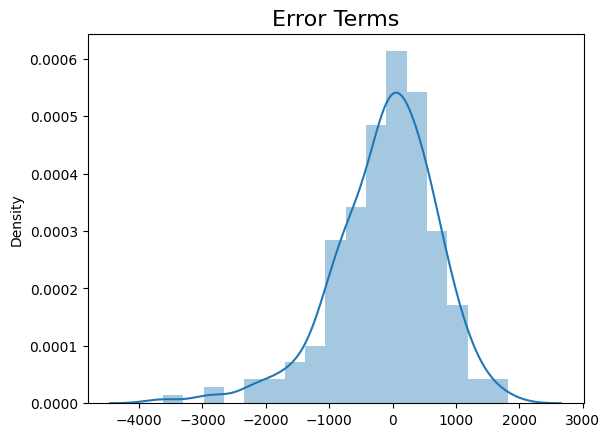

In [173]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16)
sns.distplot(res_test)
plt.show()

**Inference:**
 the above distribution plot shows that , error terms are normally distributed with mean at zero.

Text(0, 0.5, 'Residual')

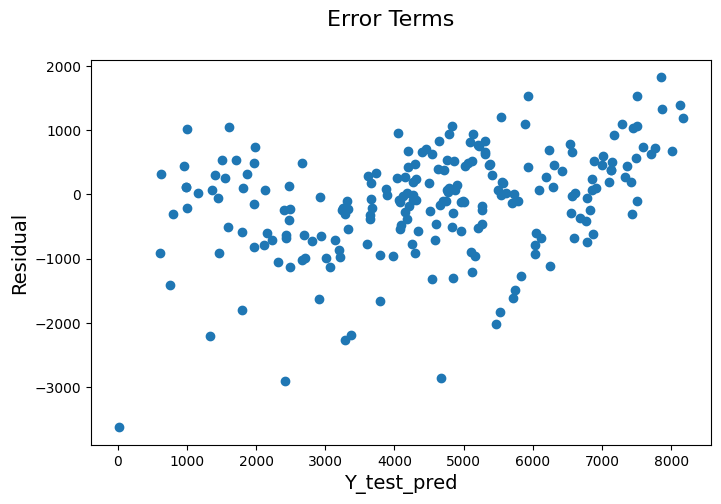

In [174]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)

**Inference:**
- Above scatter plot depicts that error trems are randomly distributed and do not follow any pattern.
- Also the error terms are having reasonably constant variance.

Text(0, 0.5, 'y_test_pred')

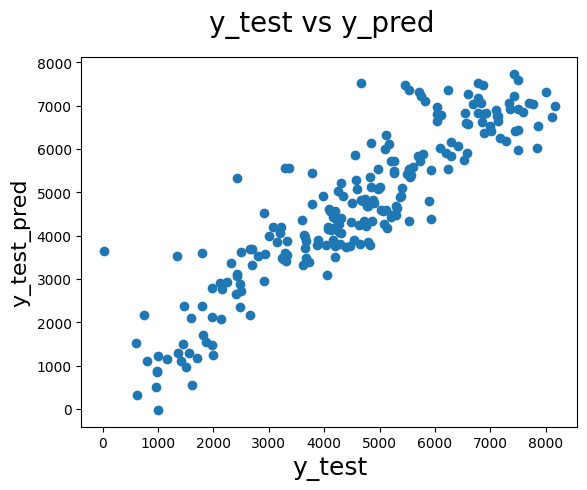

In [175]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

**Inference:**
We can conclude that our Model `lm-6` was not fitted by chance, and has good prediction ability.

# Conclusion


In [176]:
# R-squared and Adj. R-squared

print('R-squared train:', round(lm_final.rsquared,2),'Adj. R-squared train:', round(lm_final.rsquared_adj,3))
print('R-squared test:', round(r2_test,2),'Adj. R-squared test:', round(r2_test_adj,3))

# Coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R-squared train: 0.83 Adj. R-squared train: 0.824
R-squared test: 0.81 Adj. R-squared test: 0.803

Coefficent for the variables are:
const                1236.691
year                 2107.171
is_holiday           -806.839
temp                 4573.331
windspeed           -1148.078
season_summer         771.906
season_winter        1206.739
month_sep             837.138
weather_Misty        -690.767
weather_LightRain   -2202.272
dtype: float64
